In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

flights = sns.load_dataset('flights')
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

# Categorical Plots
Things to notice, you can basically perform your groupby and pivot operations using catplot parameters 


- **Seaborn**: x, y, and hue and then passing an agg function via estimator
- **Pivot table**: index, columns, values and then pass agg function via aggfunc

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


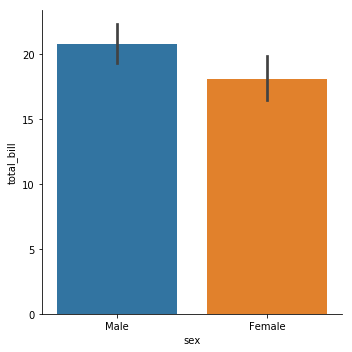

In [2]:
sns.catplot(x='sex', y='total_bill', data=tips, kind='bar', estimator=np.mean)

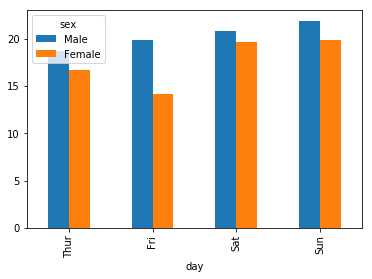

In [3]:
tips.pivot_table(index='day',columns='sex', values='total_bill', aggfunc=np.mean).plot(kind='bar')

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


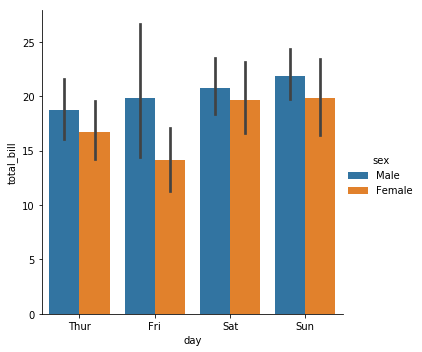

In [4]:
sns.catplot(x='day', y='total_bill', data=tips, hue='sex', kind='bar', estimator=np.mean)

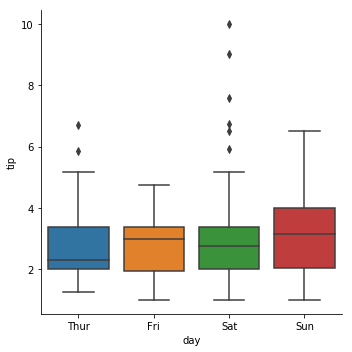

In [5]:
#can also compare distributions within categories
sns.catplot(x='day', y='tip', data=tips, kind='box')

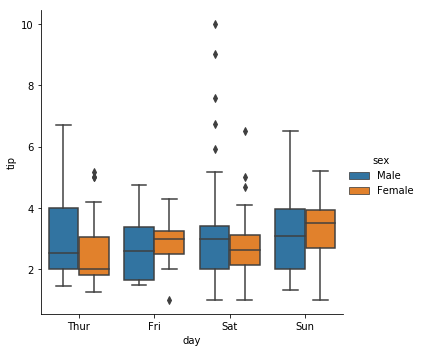

In [6]:
sns.catplot(x='day', y='tip', hue='sex', data=tips, kind='box')

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


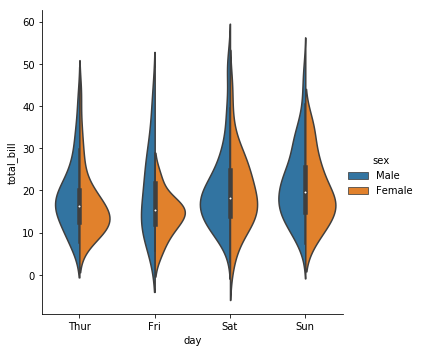

In [7]:
sns.catplot(x='day', y='total_bill', data=tips, kind='violin', hue='sex', split=True)

# Matrix Plots

### Heat-map

- Requires that indices and columns be categorical variables
    - Freequency table
    - Correlation table
    - Pivot table


In [8]:
#correlation table
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


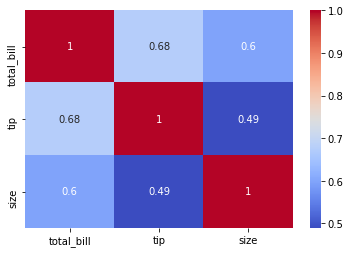

In [9]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

In [10]:
#frequency table
pd.crosstab(tips['day'], tips['time'])

time,Lunch,Dinner
day,,
Thur,61,1
Fri,7,12
Sat,0,87
Sun,0,76


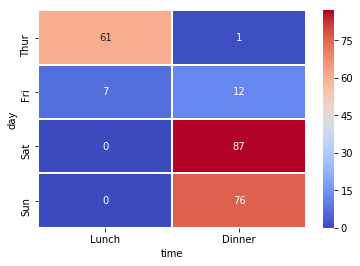

In [11]:
sns.heatmap(pd.crosstab(tips['day'], tips['time']),cmap='coolwarm', annot=True, linecolor='white', linewidths=1)

In [12]:
#pivot_table
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


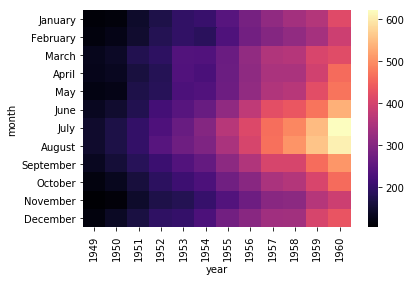

In [13]:
sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'),cmap='magma')

### Cluster Map

    - Similar to heatmap but groups together similar observations
    - You'll notice that the axis will be out of order from above

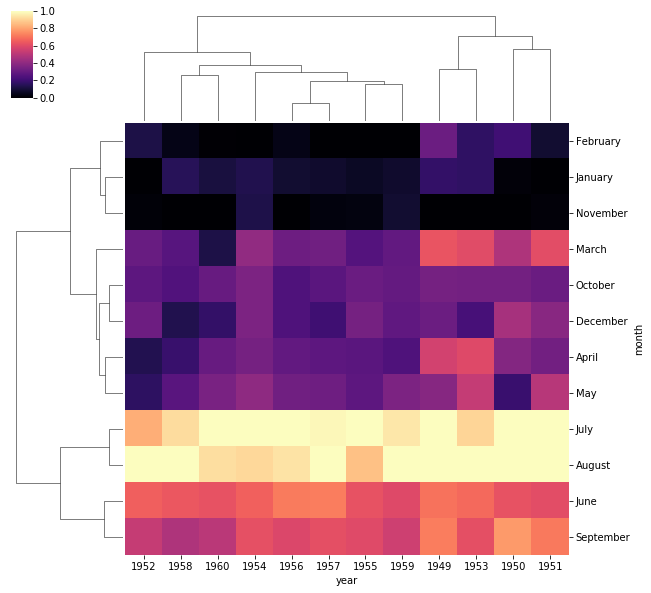

In [14]:
sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'),cmap='magma',standard_scale=1)

# Grids

- Pairplot
- Pair-Grid
- Facet-Grid
- Joint-Grid

## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


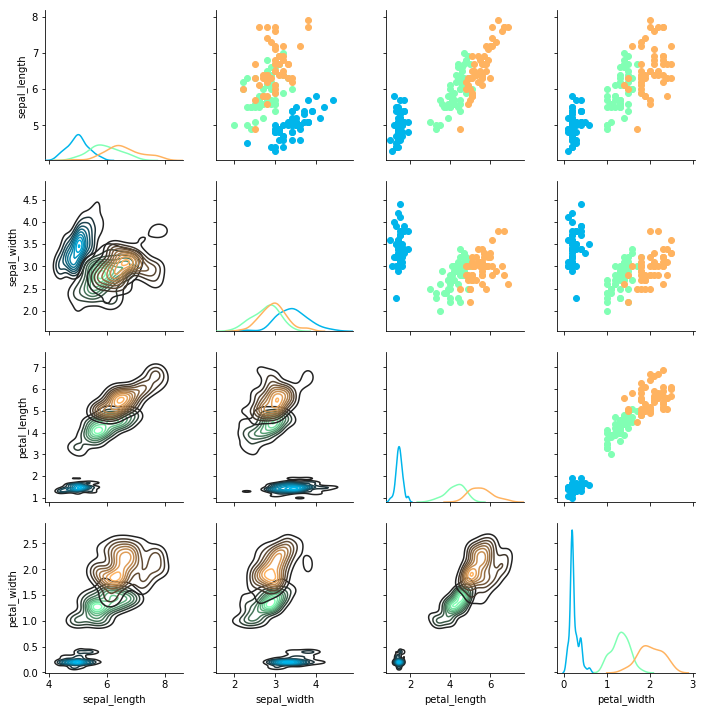

In [15]:
g = sns.PairGrid(iris, hue='species', palette='rainbow')
g.map_diag(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


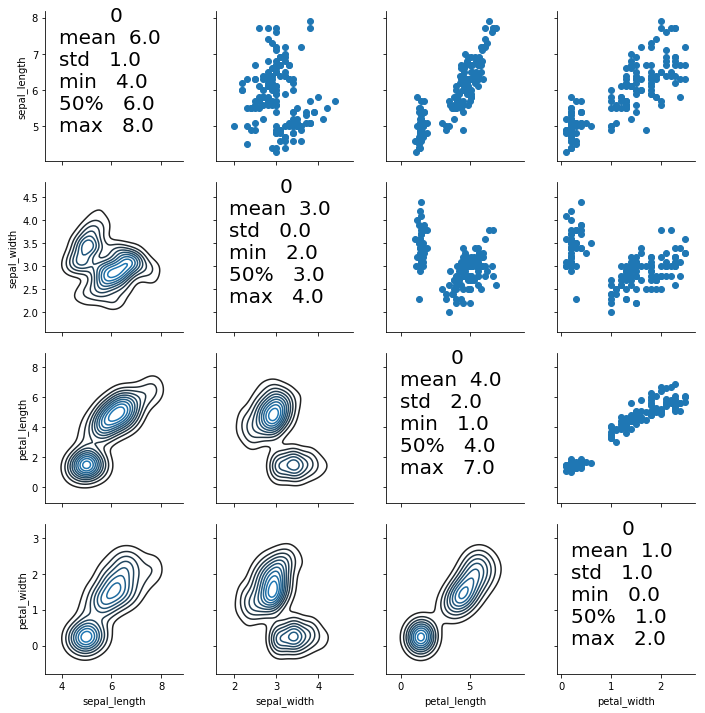

In [16]:
# you can even pass your own custom functions 
def summary(x, **kwargs):
    # Convert to a pandas series
    x = pd.Series(x)
    
    # Get stats for the series
    label = x.describe()[['mean', 'std', 'min', '50%', 'max']]
       
    # Round the labels for presentation
    label = label.round()
    ax = plt.gca()
    ax.set_axis_off()

    # Add the labels to the plot
    ax.annotate(pd.DataFrame(label),
               xy = (0.1, 0.2), size = 20, xycoords = ax.transAxes) 
    

g = sns.PairGrid(iris)
g.map_diag(summary)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:

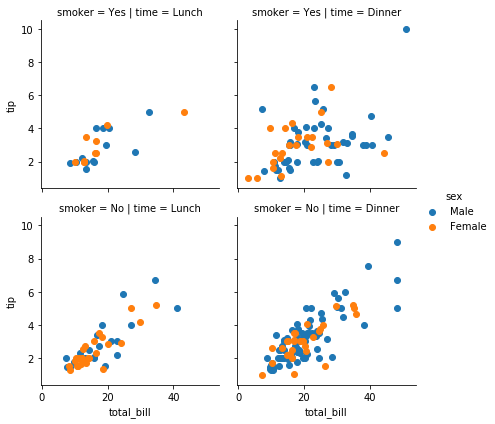

In [17]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


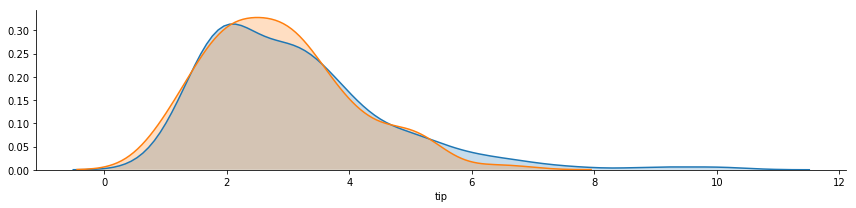

In [20]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( tips, hue = 'sex', aspect=4 )
a.map(sns.kdeplot, 'tip', shade= True )

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/core/fr

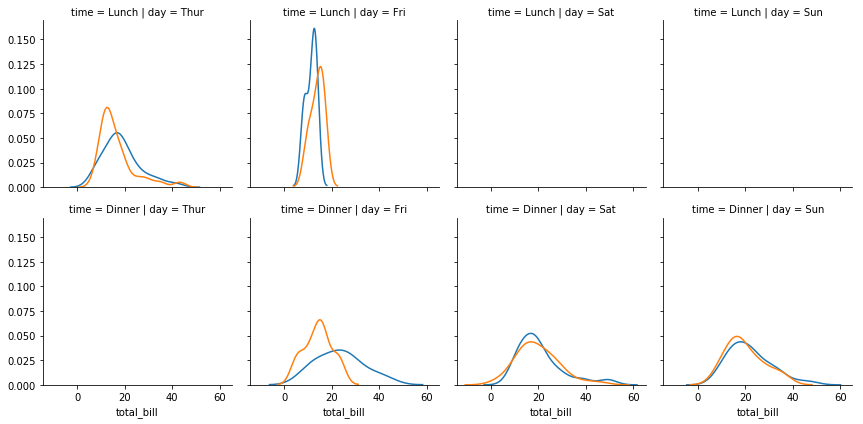

In [18]:
g = sns.FacetGrid(tips, col='day',  row='time', hue='sex')
g.map(sns.kdeplot, 'total_bill')